In [55]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [56]:
import os
os.getcwd()

'C:\\Users\\91959'

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# load the customer data into a DataFrame
survey_df = pd.read_csv('WheelchairSurvey.csv')

# Check the first 5 rows
survey_df

,Submitted,Name/Roll No,Age,Occupation,What would you want the basic frame of the wheelchair to be?,Foldable Wheelchair,Reclining Wheelchair,Motorized Wheelchair,Paediatric Wheelchair,Bariatric Wheelchair,...,Patient Transfer Wheelchair,Wheelchair cum Walker,Head Motion Sensor Wheelchair,Voice Control Wheelchair,Multi-gear Operated Wheelchair,Color Printed Plastic Wheelchair,Auxiliary Features 1,Auxiliary Features 2,Final Price,Perceived Value
0,04/26/2023 17:14,194154004,30,Manager,5000,1500,7000,12500,2000,5000,...,30880,2500,82500,49500,85000,0,"[Luggage Carrying Wheelchair, Breaking mechani...",[Wheelchair Safety Belt],935130,8
1,04/26/2023 15:37,Dr Pramod Tiwari,60 yrs,Govt. Servant,42500,1600,22500,12500,2500,7500,...,32655,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],802505,10
2,04/26/2023 15:31,Kiran,35,Junior Technician,42500,0,0,12500,0,0,...,0,0,0,0,0,0,"[Luggage Carrying Wheelchair, Clamping Feature...","[Wheelchair Safety Belt, Theme-based wheelchai...",123900,10
3,04/26/2023 13:21,Dr vineeta,50 yrs,Doctor,5000,1500,7000,12500,2000,7500,...,32655,2500,82500,49500,13000,7000,"[Luggage Carrying Wheelchair, Car transfer whe...",[Wheelchair Safety Belt],800505,8
4,04/26/2023 13:00,Shivangi,NaN,NaN,5000,1600,22500,0,2500,7500,...,32655,2500,82500,49500,85000,7000,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],708505,10
5,04/26/2023 12:45,Dr.riya shukla,25,Doctor,42500,0,0,12500,0,0,...,0,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],164250,10
6,04/26/2023 11:28,Ashish,28,Railway engineer,42500,0,0,0,0,0,...,0,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],175250,10
7,04/26/2023 9:23,Sneh,26,MBBS STUDENT,42500,0,0,0,0,0,...,32655,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Umbrella Holder ...","[Wheelchair Safety Belt, Free Drinking Mug Whe...",536755,6
8,04/26/2023 8:40,Aeklavya sinha,23,Medical student,42500,1500,7000,12500,2000,0,...,30880,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Eating Table Whe...","[Wheelchair Safety Belt, Free Drinking Mug Whe...",1055430,10
9,04/26/2023 8:03,Gayatri Kumari,23,MBBS students,42500,1600,7000,12500,2000,7500,...,30880,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Clamping Feature...",[Wheelchair Safety Belt],991130,10


In [58]:
# survey1=survey_df.iloc[:,[1,3,5,7,9,11,13,15,17,19,21,22]]
df_out=survey_df.iloc[:,4:]
df_out

,What would you want the basic frame of the wheelchair to be?,Foldable Wheelchair,Reclining Wheelchair,Motorized Wheelchair,Paediatric Wheelchair,Bariatric Wheelchair,Sit to Stand Wheelchair,Stair Climbing Wheelchair,Step Climbing Wheelchair,Stretcher cum Wheelchair,...,Patient Transfer Wheelchair,Wheelchair cum Walker,Head Motion Sensor Wheelchair,Voice Control Wheelchair,Multi-gear Operated Wheelchair,Color Printed Plastic Wheelchair,Auxiliary Features 1,Auxiliary Features 2,Final Price,Perceived Value
0,5000,1500,7000,12500,2000,5000,115000,30000,50000,35000,...,30880,2500,82500,49500,85000,0,"[Luggage Carrying Wheelchair, Breaking mechani...",[Wheelchair Safety Belt],935130,8
1,42500,1600,22500,12500,2500,7500,137500,57500,72500,52500,...,32655,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],802505,10
2,42500,0,0,12500,0,0,17000,0,25000,0,...,0,0,0,0,0,0,"[Luggage Carrying Wheelchair, Clamping Feature...","[Wheelchair Safety Belt, Theme-based wheelchai...",123900,10
3,5000,1500,7000,12500,2000,7500,17000,20000,25000,52500,...,32655,2500,82500,49500,13000,7000,"[Luggage Carrying Wheelchair, Car transfer whe...",[Wheelchair Safety Belt],800505,8
4,5000,1600,22500,0,2500,7500,115000,30000,50000,52500,...,32655,2500,82500,49500,85000,7000,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],708505,10
5,42500,0,0,12500,0,0,0,0,0,0,...,0,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],164250,10
6,42500,0,0,0,0,0,0,57500,72500,0,...,0,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],175250,10
7,42500,0,0,0,0,0,137500,0,0,0,...,32655,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Umbrella Holder ...","[Wheelchair Safety Belt, Free Drinking Mug Whe...",536755,6
8,42500,1500,7000,12500,2000,0,0,57500,72500,39500,...,30880,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Eating Table Whe...","[Wheelchair Safety Belt, Free Drinking Mug Whe...",1055430,10
9,42500,1600,7000,12500,2000,7500,115000,30000,50000,35000,...,30880,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Clamping Feature...",[Wheelchair Safety Belt],991130,10


In [59]:
#The data is being cleaned using the follow
df_out.columns = df_out.columns.str.replace('\(Second Choice\)', '')
df_out.columns = df_out.columns.str.replace('\[Refer to Image\]', '')
df_out.columns = df_out.columns.str.replace('\[Has a multiplier effect\]', '')
df_out.columns = df_out.columns.str.replace(' ', '')
df_out.columns = df_out.columns.str.replace('forSecondChoice', '')
df_out.columns = df_out.columns.str.replace('Whatwouldyouwantthebasicframeofthewheelchairtobe\?', 'BasicWheelchair')
df_out.columns = df_out.columns.str.replace('Wheelchair', '')
df_out

C:\Users\91959\AppData\Local\Temp\ipykernel_15644\1538674209.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\91959\AppData\Local\Temp\ipykernel_15644\1538674209.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\91959\AppData\Local\Temp\ipykernel_15644\1538674209.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\91959\AppData\Local\Temp\ipykernel_15644\1538674209.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



,Basic,Foldable,Reclining,Motorized,Paediatric,Bariatric,SittoStand,StairClimbing,StepClimbing,Stretchercum,...,PatientTransfer,cumWalker,HeadMotionSensor,VoiceControl,Multi-gearOperated,ColorPrintedPlastic,AuxiliaryFeatures1,AuxiliaryFeatures2,FinalPrice,PerceivedValue
0,5000,1500,7000,12500,2000,5000,115000,30000,50000,35000,...,30880,2500,82500,49500,85000,0,"[Luggage Carrying Wheelchair, Breaking mechani...",[Wheelchair Safety Belt],935130,8
1,42500,1600,22500,12500,2500,7500,137500,57500,72500,52500,...,32655,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],802505,10
2,42500,0,0,12500,0,0,17000,0,25000,0,...,0,0,0,0,0,0,"[Luggage Carrying Wheelchair, Clamping Feature...","[Wheelchair Safety Belt, Theme-based wheelchai...",123900,10
3,5000,1500,7000,12500,2000,7500,17000,20000,25000,52500,...,32655,2500,82500,49500,13000,7000,"[Luggage Carrying Wheelchair, Car transfer whe...",[Wheelchair Safety Belt],800505,8
4,5000,1600,22500,0,2500,7500,115000,30000,50000,52500,...,32655,2500,82500,49500,85000,7000,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],708505,10
5,42500,0,0,12500,0,0,0,0,0,0,...,0,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],164250,10
6,42500,0,0,0,0,0,0,57500,72500,0,...,0,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],175250,10
7,42500,0,0,0,0,0,137500,0,0,0,...,32655,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Umbrella Holder ...","[Wheelchair Safety Belt, Free Drinking Mug Whe...",536755,6
8,42500,1500,7000,12500,2000,0,0,57500,72500,39500,...,30880,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Eating Table Whe...","[Wheelchair Safety Belt, Free Drinking Mug Whe...",1055430,10
9,42500,1600,7000,12500,2000,7500,115000,30000,50000,35000,...,30880,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Clamping Feature...",[Wheelchair Safety Belt],991130,10


In [60]:
df_out.iloc[:,1:25]

,Foldable,Reclining,Motorized,Paediatric,Bariatric,SittoStand,StairClimbing,StepClimbing,Stretchercum,AugmentedReality-Based,...,HeightRaisingelevated,LightWeight,Smart,Multi-sport,PatientTransfer,cumWalker,HeadMotionSensor,VoiceControl,Multi-gearOperated,ColorPrintedPlastic
0,1500,7000,12500,2000,5000,115000,30000,50000,35000,207500,...,30000,3000,77500,39000,30880,2500,82500,49500,85000,0
1,1600,22500,12500,2500,7500,137500,57500,72500,52500,207500,...,67500,5500,77500,0,32655,0,0,0,0,0
2,0,0,12500,0,0,17000,0,25000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500,7000,12500,2000,7500,17000,20000,25000,52500,207500,...,30000,3000,77500,39500,32655,2500,82500,49500,13000,7000
4,1600,22500,0,2500,7500,115000,30000,50000,52500,0,...,67500,5500,0,39500,32655,2500,82500,49500,85000,7000
5,0,0,12500,0,0,0,0,0,0,0,...,0,0,77500,0,0,0,0,0,0,0
6,0,0,0,0,0,0,57500,72500,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,137500,0,0,0,0,...,0,0,77500,0,32655,2500,82500,49500,85000,7000
8,1500,7000,12500,2000,0,0,57500,72500,39500,207500,...,67500,3000,77500,39000,30880,2500,82500,49500,85000,7000
9,1600,7000,12500,2000,7500,115000,30000,50000,35000,207500,...,30000,3000,77500,39000,30880,2500,82500,49500,85000,7000


In [61]:
df_out[df_out.iloc[:,1:25].columns]

,Foldable,Reclining,Motorized,Paediatric,Bariatric,SittoStand,StairClimbing,StepClimbing,Stretchercum,AugmentedReality-Based,...,HeightRaisingelevated,LightWeight,Smart,Multi-sport,PatientTransfer,cumWalker,HeadMotionSensor,VoiceControl,Multi-gearOperated,ColorPrintedPlastic
0,1500,7000,12500,2000,5000,115000,30000,50000,35000,207500,...,30000,3000,77500,39000,30880,2500,82500,49500,85000,0
1,1600,22500,12500,2500,7500,137500,57500,72500,52500,207500,...,67500,5500,77500,0,32655,0,0,0,0,0
2,0,0,12500,0,0,17000,0,25000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500,7000,12500,2000,7500,17000,20000,25000,52500,207500,...,30000,3000,77500,39500,32655,2500,82500,49500,13000,7000
4,1600,22500,0,2500,7500,115000,30000,50000,52500,0,...,67500,5500,0,39500,32655,2500,82500,49500,85000,7000
5,0,0,12500,0,0,0,0,0,0,0,...,0,0,77500,0,0,0,0,0,0,0
6,0,0,0,0,0,0,57500,72500,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,137500,0,0,0,0,...,0,0,77500,0,32655,2500,82500,49500,85000,7000
8,1500,7000,12500,2000,0,0,57500,72500,39500,207500,...,67500,3000,77500,39000,30880,2500,82500,49500,85000,7000
9,1600,7000,12500,2000,7500,115000,30000,50000,35000,207500,...,30000,3000,77500,39000,30880,2500,82500,49500,85000,7000


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaler.fit(df_out[['Frame', 'Seat','Handles', 'Brakes', 'WheelRim', 'Tyre', 'Tube', 'GearSet', 'Fork','BatteryBackupMotor']])
scaler.fit(df_out[df_out.iloc[:,1:25].columns])

scaled_data = scaler.transform(df_out[df_out.iloc[:,1:25].columns])
# scaled_data = scaler.transform(df_out[['Frame', 'Seat','Handles', 'Brakes', 'WheelRim', 'Tyre', 'Tube', 'GearSet', 'Fork','BatteryBackupMotor']])

In [63]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [64]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

C:\Users\91959\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



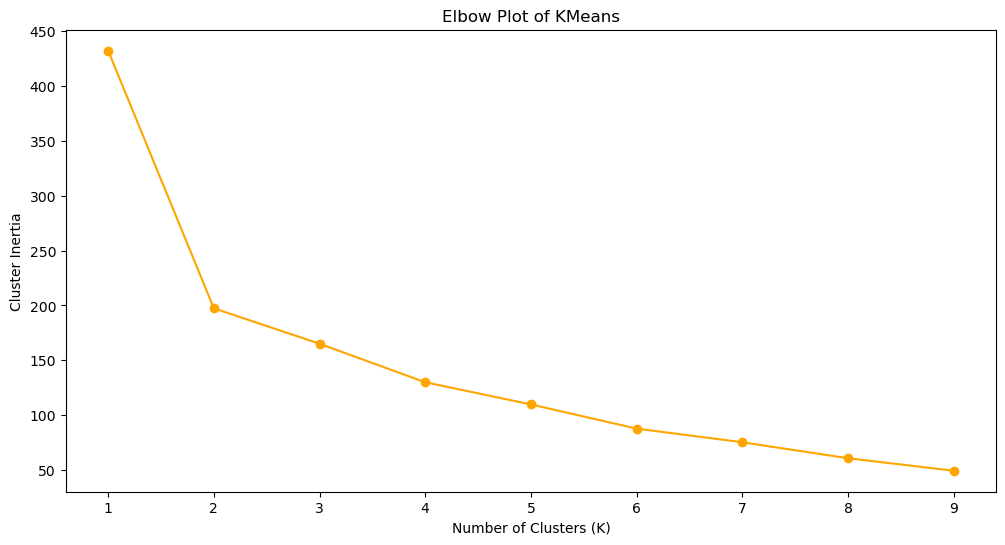

In [65]:
clusters_centers, k_values = find_best_clusters(scaled_data, 10)

generate_elbow_plot(clusters_centers, k_values)

In [66]:
kmeans_model = KMeans(n_clusters = 4)

kmeans_model.fit(scaled_data)

KMeans(n_clusters=4)

In [67]:
df_out["clusters"] = kmeans_model.labels_

In [68]:
df_out.sort_values(by=["clusters"])

,Basic,Foldable,Reclining,Motorized,Paediatric,Bariatric,SittoStand,StairClimbing,StepClimbing,Stretchercum,...,cumWalker,HeadMotionSensor,VoiceControl,Multi-gearOperated,ColorPrintedPlastic,AuxiliaryFeatures1,AuxiliaryFeatures2,FinalPrice,PerceivedValue,clusters
17,5000,0,7000,0,0,0,17000,57500,0,0,...,0,0,0,0,0,"[Luggage Carrying Wheelchair, Eating Table Whe...","[Wheelchair Safety Belt, Lap Tray Bag Wheelcha...",187000,8,0
15,42500,0,0,12500,0,0,17000,0,72500,0,...,0,0,0,0,0,"[Luggage Carrying Wheelchair, Clamping Feature...","[Wheelchair Safety Belt, Free Drinking Mug Whe...",205350,8,0
2,42500,0,0,12500,0,0,17000,0,25000,0,...,0,0,0,0,0,"[Luggage Carrying Wheelchair, Clamping Feature...","[Wheelchair Safety Belt, Theme-based wheelchai...",123900,10,0
14,42500,0,0,12500,0,0,17000,0,72500,0,...,0,0,0,0,0,"[Luggage Carrying Wheelchair, Eating Table Whe...","[Wheelchair Safety Belt, Izzy Wheels Wheelchai...",228050,9,0
5,42500,0,0,12500,0,0,0,0,0,0,...,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],164250,10,0
6,42500,0,0,0,0,0,0,57500,72500,0,...,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],175250,10,0
16,42500,0,0,12500,0,0,17000,0,25000,0,...,0,0,0,0,0,"[Luggage Carrying Wheelchair, Breaking mechani...","[Wheelchair Safety Belt, Sticker logo-based Wh...",130250,10,0
13,42500,1600,22500,12500,2000,7500,115000,30000,72500,35000,...,2500,82500,49500,42500,7000,"[Luggage Carrying Wheelchair, Eating Table Whe...","[Wheelchair Safety Belt, Soft Pouch Holder Whe...",1077130,8,1
12,42500,1600,7000,12500,2500,7500,115000,30000,50000,35000,...,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Umbrella Holder ...","[Wheelchair Safety Belt, Sherpa Wheelchair Foo...",1076730,8,1
11,42500,1600,22500,12500,2000,7500,115000,30000,50000,35000,...,2500,82500,49500,85000,7000,"[Clamping Feature Shifting wheelchair to Bed, ...","[Wheelchair Safety Belt, Theme-based wheelchair]",1100705,5,1


In [69]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [70]:
df_out.iloc[:,1:25].columns

Index(['Foldable', 'Reclining', 'Motorized', 'Paediatric', 'Bariatric',
       'SittoStand', 'StairClimbing', 'StepClimbing', 'Stretchercum',
       'AugmentedReality-Based', 'Leverhand-operated',
       'OneArmManualHemiplegic', 'TennisSports', 'AllTerrain',
       'HeightRaisingelevated', 'LightWeight', 'Smart', 'Multi-sport',
       'PatientTransfer', 'cumWalker', 'HeadMotionSensor', 'VoiceControl',
       'Multi-gearOperated', 'ColorPrintedPlastic'],
      dtype='object')

In [71]:
norm_X = MinMaxScaler().fit_transform(df_out[df_out.iloc[:,1:25].columns])

In [72]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(norm_X)
evr = np.cumsum(pca.explained_variance_ratio_)
print(evr)

[0.60604227 0.7047777  0.79925942]


In [73]:
X_pca=pd.DataFrame(X_pca)
X_pca

,0,1,2
0,-1.335524,-0.597274,0.049559
1,-0.286933,1.186435,-1.626583
2,2.190130,-0.123845,-0.024952
3,-1.500526,-0.811436,-0.081512
4,-1.352667,1.508440,0.614816
5,1.670670,-1.460184,-0.137369
6,2.153829,0.374323,-0.036978
7,0.485243,0.195727,2.120560
8,-1.510475,-0.696663,0.065491
9,-1.507949,-0.004780,0.386160


In [74]:
X_pca.columns=["PC1","PC2","PC3"]
X_pca["y"]=df_out["clusters"]
X_pca

,PC1,PC2,PC3,y
0,-1.335524,-0.597274,0.049559,1
1,-0.286933,1.186435,-1.626583,2
2,2.190130,-0.123845,-0.024952,0
3,-1.500526,-0.811436,-0.081512,1
4,-1.352667,1.508440,0.614816,1
5,1.670670,-1.460184,-0.137369,0
6,2.153829,0.374323,-0.036978,0
7,0.485243,0.195727,2.120560,3
8,-1.510475,-0.696663,0.065491,1
9,-1.507949,-0.004780,0.386160,1


In [75]:
fig = px.scatter_3d(X_pca, x='PC1', y='PC2', z='PC3',color='y',title="Cycle Segmentation")
fig.update_traces(marker_coloraxis=None)
fig.show()

In [76]:
df_out

,Basic,Foldable,Reclining,Motorized,Paediatric,Bariatric,SittoStand,StairClimbing,StepClimbing,Stretchercum,...,cumWalker,HeadMotionSensor,VoiceControl,Multi-gearOperated,ColorPrintedPlastic,AuxiliaryFeatures1,AuxiliaryFeatures2,FinalPrice,PerceivedValue,clusters
0,5000,1500,7000,12500,2000,5000,115000,30000,50000,35000,...,2500,82500,49500,85000,0,"[Luggage Carrying Wheelchair, Breaking mechani...",[Wheelchair Safety Belt],935130,8,1
1,42500,1600,22500,12500,2500,7500,137500,57500,72500,52500,...,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],802505,10,2
2,42500,0,0,12500,0,0,17000,0,25000,0,...,0,0,0,0,0,"[Luggage Carrying Wheelchair, Clamping Feature...","[Wheelchair Safety Belt, Theme-based wheelchai...",123900,10,0
3,5000,1500,7000,12500,2000,7500,17000,20000,25000,52500,...,2500,82500,49500,13000,7000,"[Luggage Carrying Wheelchair, Car transfer whe...",[Wheelchair Safety Belt],800505,8,1
4,5000,1600,22500,0,2500,7500,115000,30000,50000,52500,...,2500,82500,49500,85000,7000,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],708505,10,1
5,42500,0,0,12500,0,0,0,0,0,0,...,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],164250,10,0
6,42500,0,0,0,0,0,0,57500,72500,0,...,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],175250,10,0
7,42500,0,0,0,0,0,137500,0,0,0,...,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Umbrella Holder ...","[Wheelchair Safety Belt, Free Drinking Mug Whe...",536755,6,3
8,42500,1500,7000,12500,2000,0,0,57500,72500,39500,...,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Eating Table Whe...","[Wheelchair Safety Belt, Free Drinking Mug Whe...",1055430,10,1
9,42500,1600,7000,12500,2000,7500,115000,30000,50000,35000,...,2500,82500,49500,85000,7000,"[Luggage Carrying Wheelchair, Clamping Feature...",[Wheelchair Safety Belt],991130,10,1


In [77]:
df_out[df_out.clusters==0]

,Basic,Foldable,Reclining,Motorized,Paediatric,Bariatric,SittoStand,StairClimbing,StepClimbing,Stretchercum,...,cumWalker,HeadMotionSensor,VoiceControl,Multi-gearOperated,ColorPrintedPlastic,AuxiliaryFeatures1,AuxiliaryFeatures2,FinalPrice,PerceivedValue,clusters
2,42500,0,0,12500,0,0,17000,0,25000,0,...,0,0,0,0,0,"[Luggage Carrying Wheelchair, Clamping Feature...","[Wheelchair Safety Belt, Theme-based wheelchai...",123900,10,0
5,42500,0,0,12500,0,0,0,0,0,0,...,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],164250,10,0
6,42500,0,0,0,0,0,0,57500,72500,0,...,0,0,0,0,0,[Luggage Carrying Wheelchair],[Wheelchair Safety Belt],175250,10,0
14,42500,0,0,12500,0,0,17000,0,72500,0,...,0,0,0,0,0,"[Luggage Carrying Wheelchair, Eating Table Whe...","[Wheelchair Safety Belt, Izzy Wheels Wheelchai...",228050,9,0
15,42500,0,0,12500,0,0,17000,0,72500,0,...,0,0,0,0,0,"[Luggage Carrying Wheelchair, Clamping Feature...","[Wheelchair Safety Belt, Free Drinking Mug Whe...",205350,8,0
16,42500,0,0,12500,0,0,17000,0,25000,0,...,0,0,0,0,0,"[Luggage Carrying Wheelchair, Breaking mechani...","[Wheelchair Safety Belt, Sticker logo-based Wh...",130250,10,0
17,5000,0,7000,0,0,0,17000,57500,0,0,...,0,0,0,0,0,"[Luggage Carrying Wheelchair, Eating Table Whe...","[Wheelchair Safety Belt, Lap Tray Bag Wheelcha...",187000,8,0


In [78]:
price=df_out.max()
price

Basic                                             42500
Foldable                                           1600
Reclining                                         22500
Motorized                                         12500
Paediatric                                         2500
Bariatric                                          7500
SittoStand                                       137500
StairClimbing                                     57500
StepClimbing                                      72500
Stretchercum                                      52500
AugmentedReality-Based                           207500
Leverhand-operated                                10000
OneArmManualHemiplegic                            19000
TennisSports                                      32500
AllTerrain                                        47500
HeightRaisingelevated                             67500
LightWeight                                        5500
Smart                                           

In [79]:
temp= pd.DataFrame(df_out.mean())
temp[1]=price
# temp

C:\Users\91959\AppData\Local\Temp\ipykernel_15644\3597622769.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Importance
Basic,0.803922
Motorized,0.777778
StepClimbing,0.620690
Smart,0.611111
PatientTransfer,0.592992
VoiceControl,0.555556
HeadMotionSensor,0.555556
cumWalker,0.555556
Foldable,0.541667
LightWeight,0.510101


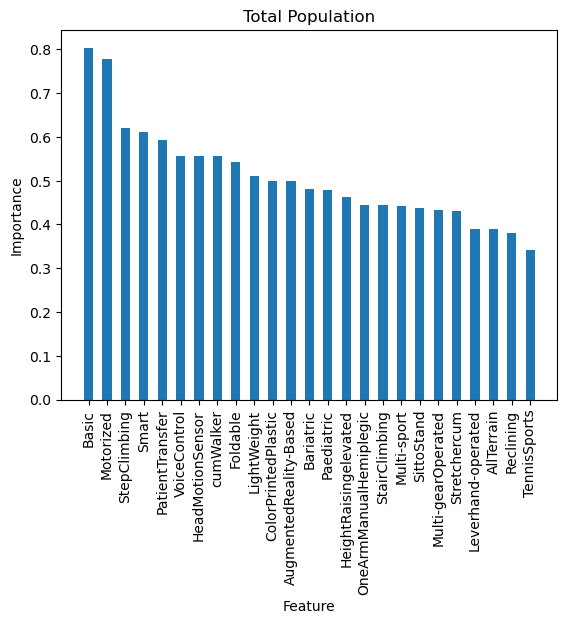

In [80]:
resultTotal=pd.DataFrame(temp[0]/temp[1])
resultTotal=resultTotal[:25]
resultTotal.rename(columns={0:"Importance"},inplace=True)
plt.bar((resultTotal.sort_values(by=["Importance"],ascending=False)).index,resultTotal.sort_values(by=["Importance"],ascending=False)["Importance"],width=0.5)
plt.xlabel('Feature') 
plt.xticks(rotation = 90)
plt.ylabel('Importance')
plt.title("Total Population")
resultTotal=resultTotal.sort_values(by=["Importance"],ascending=False).apply(pd.to_numeric).style.background_gradient()
resultTotal

In [81]:
temp= pd.DataFrame((df_out[df_out.clusters==0]).mean())
temp[1]=price
# temp

C:\Users\91959\AppData\Local\Temp\ipykernel_15644\3362194835.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Importance
Basic,0.873950
Motorized,0.714286
StepClimbing,0.527094
AllTerrain,0.285714
StairClimbing,0.285714
Leverhand-operated,0.142857
Smart,0.142857
LightWeight,0.142857
OneArmManualHemiplegic,0.142857
SittoStand,0.088312


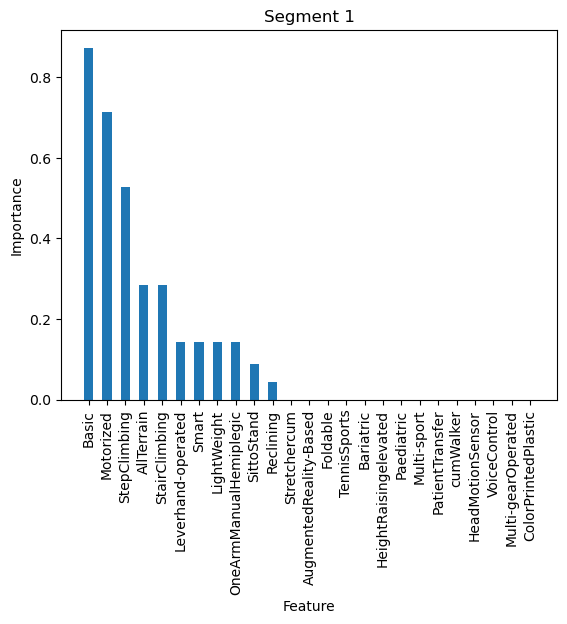

In [82]:
result0=pd.DataFrame(temp[0]/temp[1])
result0=result0[:25]
result0.rename(columns={0:"Importance"},inplace=True)
plt.bar((result0.sort_values(by=["Importance"],ascending=False)).index,result0.sort_values(by=["Importance"],ascending=False)["Importance"],width=0.5)
plt.xlabel('Feature')
plt.xticks(rotation = 90)
plt.ylabel('Importance')
plt.title("Segment 1")
result0=result0.sort_values(by=["Importance"],ascending=False).apply(pd.to_numeric).style.background_gradient()
result0

In [83]:
temp= pd.DataFrame((df_out[df_out.clusters==1]).mean())
temp[1]=price
# temp

C:\Users\91959\AppData\Local\Temp\ipykernel_15644\2963092517.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Importance
VoiceControl,1.000000
HeadMotionSensor,1.000000
cumWalker,1.000000
Foldable,0.972222
PatientTransfer,0.963763
ColorPrintedPlastic,0.888889
Motorized,0.888889
Smart,0.888889
AugmentedReality-Based,0.888889
Multi-sport,0.883263


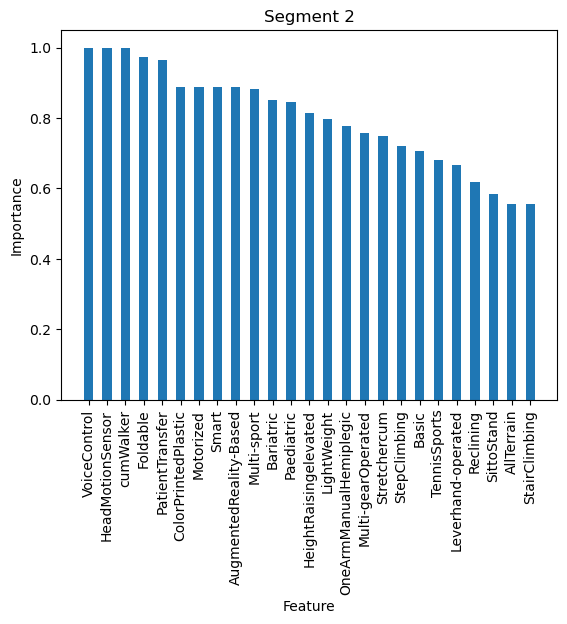

In [84]:
result1=pd.DataFrame(temp[0]/temp[1])
result1=result1[:25]
result1.rename(columns={0:"Importance"},inplace=True)
plt.bar((result1.sort_values(by=["Importance"],ascending=False)).index,result1.sort_values(by=["Importance"],ascending=False)["Importance"],width=0.5)
plt.xlabel('Feature') 
plt.xticks(rotation = 90)
plt.ylabel('Importance')
plt.title("Segment 2")
result1=result1.sort_values(by=["Importance"],ascending=False).apply(pd.to_numeric).style.background_gradient()
result1

In [85]:
temp= pd.DataFrame((df_out[df_out.clusters==2]).mean())
temp[1]=price
# temp

C:\Users\91959\AppData\Local\Temp\ipykernel_15644\2406884538.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Importance
Basic,1.000000
StepClimbing,1.000000
Smart,1.000000
LightWeight,1.000000
HeightRaisingelevated,1.000000
Foldable,1.000000
AugmentedReality-Based,1.000000
PatientTransfer,1.000000
Stretchercum,1.000000
StairClimbing,1.000000


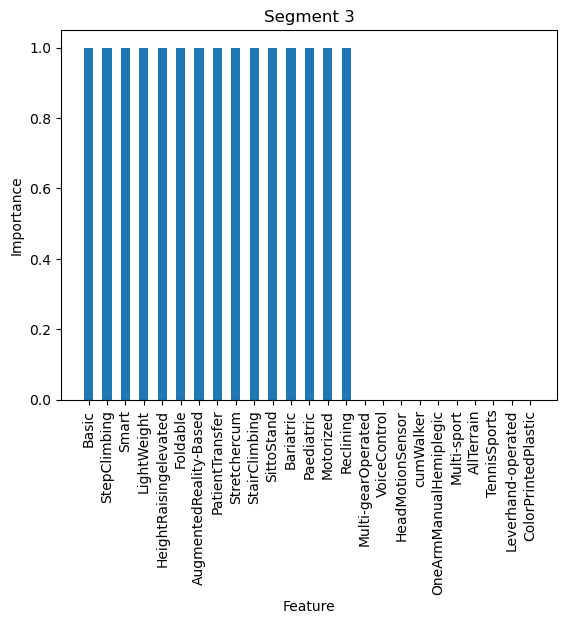

In [86]:
result2=pd.DataFrame(temp[0]/temp[1])
result2=result2[:25]
result2.rename(columns={0:"Importance"},inplace=True)
plt.bar((result2.sort_values(by=["Importance"],ascending=False)).index,result2.sort_values(by=["Importance"],ascending=False)["Importance"],width=0.5)
plt.xlabel('Feature') 
plt.xticks(rotation = 90)
plt.ylabel('Importance')
plt.title("Segment 3")
result2=result2.sort_values(by=["Importance"],ascending=False).apply(pd.to_numeric).style.background_gradient()
result2

In [87]:
temp= pd.DataFrame((df_out[df_out.clusters==3]).mean())
temp[1]=price
# temp

C:\Users\91959\AppData\Local\Temp\ipykernel_15644\1573847065.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Importance
Basic,1.000000
Smart,1.000000
Multi-gearOperated,1.000000
VoiceControl,1.000000
HeadMotionSensor,1.000000
cumWalker,1.000000
PatientTransfer,1.000000
ColorPrintedPlastic,1.000000
SittoStand,1.000000
StepClimbing,0.000000


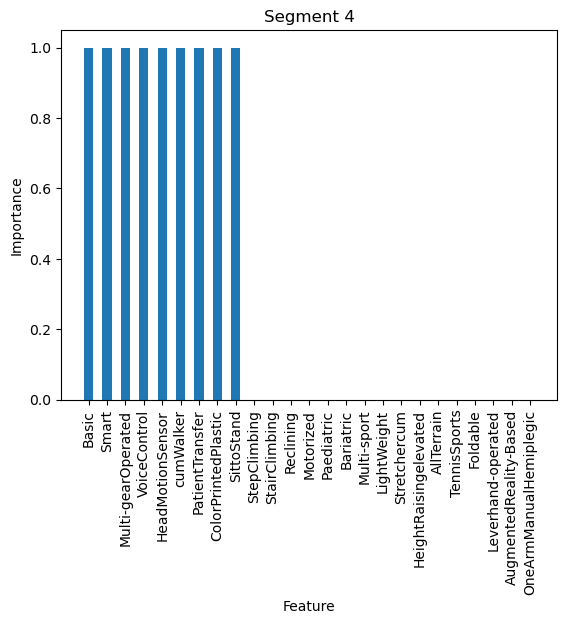

In [88]:
result3=pd.DataFrame(temp[0]/temp[1])
result3=result3[:25]
result3.rename(columns={0:"Importance"},inplace=True)
plt.bar((result3.sort_values(by=["Importance"],ascending=False)).index,result3.sort_values(by=["Importance"],ascending=False)["Importance"],width=0.5)
plt.xlabel('Feature') 
plt.xticks(rotation = 90)
plt.ylabel('Importance')
plt.title("Segment 4")
result3.sort_values(by=["Importance"],ascending=False).apply(pd.to_numeric).style.background_gradient()

In [89]:
result_aux=pd.DataFrame(pd.Series([x.strip() for y in df_out['AuxiliaryFeatures1'] for x in y[1:-1].split(',')]).value_counts())
result_aux.rename(columns={0:"Count"},inplace=True)
result_aux.apply(pd.to_numeric).style.background_gradient()

,Count
Luggage Carrying Wheelchair,17
Clamping Feature Shifting wheelchair to Bed,8
Horn system in wheelchair,8
Eating Table Wheelchair,7
Postural Support Wheelchair,6
Breaking mechanism in wheelchair,5
Head light system in wheelchair,5
Elevating leg rest wheelchair,5
Shower Commode Wheelchair,5
Umbrella Holder for Wheelchair,4


In [90]:
result_aux0=pd.DataFrame(pd.Series([x.strip() for y in df_out[df_out.clusters==0]['AuxiliaryFeatures1'] for x in y[1:-1].split(',')]).value_counts())
result_aux0.rename(columns={0:"Count"},inplace=True)
result_aux0.apply(pd.to_numeric).style.background_gradient()

,Count
Luggage Carrying Wheelchair,7
Horn system in wheelchair,5
Clamping Feature Shifting wheelchair to Bed,4
Eating Table Wheelchair,4
Head light system in wheelchair,3
Breaking mechanism in wheelchair,3
Locking mechanism in wheelchair,3
Postural Support Wheelchair,2
Umbrella Holder for Wheelchair,1
Elevating leg rest wheelchair,1


In [91]:
result_aux1=pd.DataFrame(pd.Series([x.strip() for y in df_out[df_out.clusters==1]['AuxiliaryFeatures1'] for x in y[1:-1].split(',')]).value_counts())
result_aux1.rename(columns={0:"Count"},inplace=True)
result_aux1.apply(pd.to_numeric).style.background_gradient()

,Count
Luggage Carrying Wheelchair,8
Elevating leg rest wheelchair,4
Shower Commode Wheelchair,4
Eating Table Wheelchair,3
Postural Support Wheelchair,3
Horn system in wheelchair,3
Joystick control wheelchair,3
Clamping Feature Shifting wheelchair to Bed,3
Breaking mechanism in wheelchair,2
Mobility Scooter handle Wheelchair,2


In [92]:
result_aux2=pd.DataFrame(pd.Series([x.strip() for y in df_out[df_out.clusters==2]['AuxiliaryFeatures1'] for x in y[1:-1].split(',')]).value_counts())
result_aux2.rename(columns={0:"Count"},inplace=True)
result_aux2.apply(pd.to_numeric).style.background_gradient()

,Count
Luggage Carrying Wheelchair,1


In [93]:
result_aux3=pd.DataFrame(pd.Series([x.strip() for y in df_out[df_out.clusters==3]['AuxiliaryFeatures1'] for x in y[1:-1].split(',')]).value_counts())
result_aux3.rename(columns={0:"Count"},inplace=True)
result_aux3.apply(pd.to_numeric).style.background_gradient()

,Count
Luggage Carrying Wheelchair,1
Umbrella Holder for Wheelchair,1
Clamping Feature Shifting wheelchair to Bed,1
Shower Commode Wheelchair,1
Postural Support Wheelchair,1


In [94]:
plt.style.use('default')

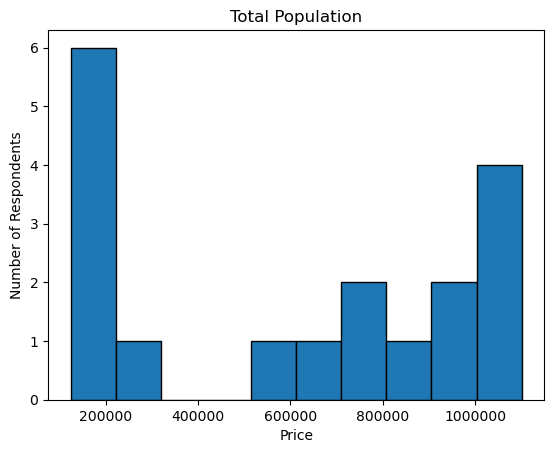

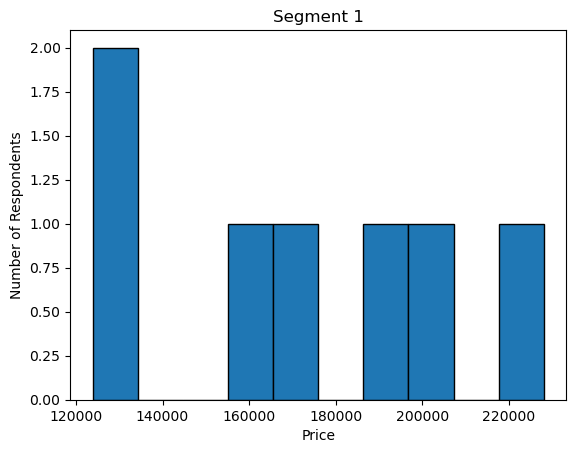

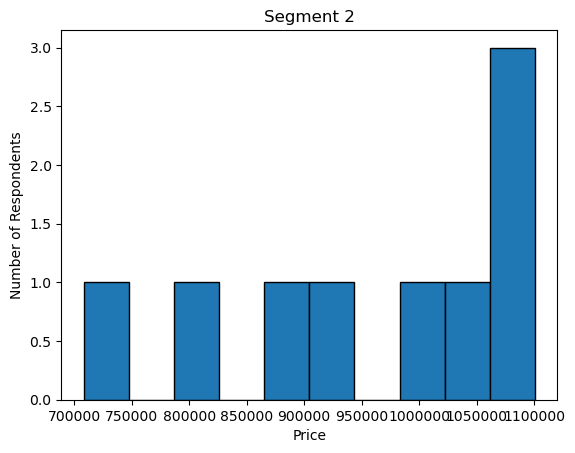

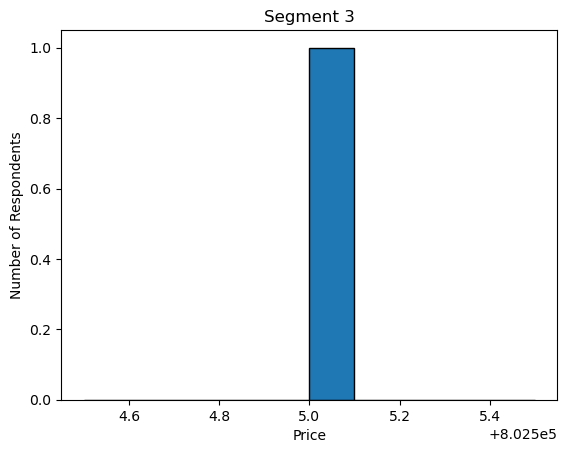

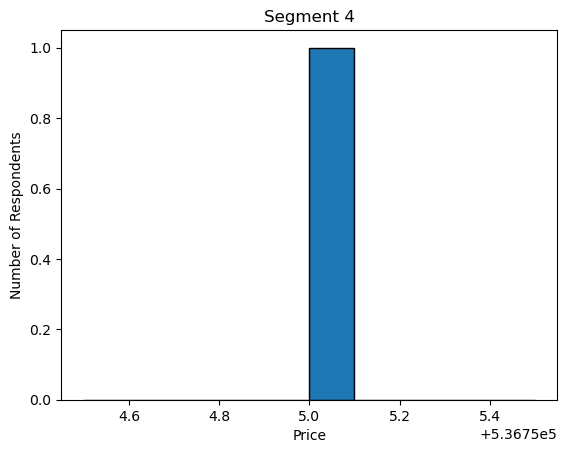

In [95]:
plt.hist(df_out["FinalPrice"],edgecolor="black")
plt.xlabel('Price') 
plt.ylabel('Number of Respondents')
plt.title("Total Population")
plt.ticklabel_format(style='plain')
plt.show()
plt.hist(df_out[df_out.clusters==0]["FinalPrice"],edgecolor="black")
plt.xlabel('Price') 
plt.ylabel('Number of Respondents')
plt.title("Segment 1")
plt.ticklabel_format(style='plain')
plt.show()
plt.hist(df_out[df_out.clusters==1]["FinalPrice"],edgecolor="black")
plt.xlabel('Price') 
plt.ylabel('Number of Respondents')
plt.title("Segment 2")
plt.ticklabel_format(style='plain')
plt.show()
plt.hist(df_out[df_out.clusters==2]["FinalPrice"],edgecolor="black")
plt.xlabel('Price') 
plt.ylabel('Number of Respondents')
plt.title("Segment 3")
plt.ticklabel_format(style='plain')
plt.show()
plt.hist(df_out[df_out.clusters==3]["FinalPrice"],edgecolor="black")
plt.xlabel('Price') 
plt.ylabel('Number of Respondents')
plt.title("Segment 4")
plt.ticklabel_format(style='plain')
plt.show()

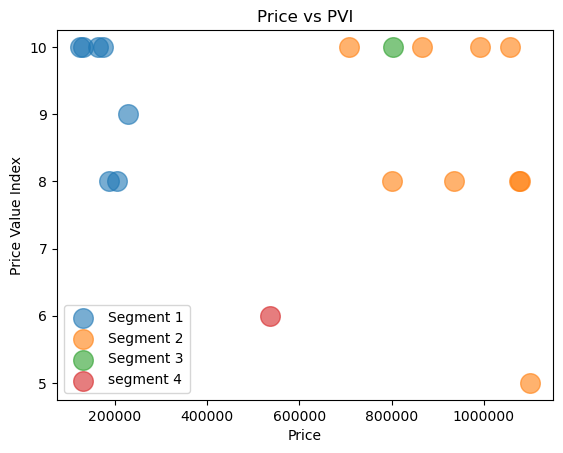

In [96]:
plt.scatter(df_out[df_out.clusters==0]['FinalPrice'],df_out[df_out.clusters==0]['PerceivedValue'],alpha=0.6,s=200)
plt.scatter(df_out[df_out.clusters==1]['FinalPrice'],df_out[df_out.clusters==1]['PerceivedValue'],alpha=0.6,s=200)
plt.scatter(df_out[df_out.clusters==2]['FinalPrice'],df_out[df_out.clusters==2]['PerceivedValue'],alpha=0.6,s=200)
plt.scatter(df_out[df_out.clusters==3]['FinalPrice'],df_out[df_out.clusters==3]['PerceivedValue'],alpha=0.6,s=200)
plt.legend(["Segment 1","Segment 2","Segment 3","segment 4"])
plt.xlabel('Price') 
plt.ylabel('Price Value Index')
plt.title("Price vs PVI")
plt.ticklabel_format(style='plain')
plt.show()

In [97]:
len(df_out[df_out.clusters==(1-1)])

7